# Unsupervised Learning

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## Clustering

### K-Means

In [2]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])


In [3]:
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

In [4]:
def plot_cluster(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel(r"$X_{1}$", fontsize=14)
    plt.ylabel(r"$x_{2}$", fontsize=14)


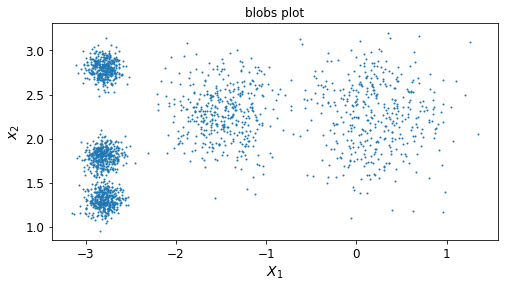

In [5]:
plt.figure(figsize=(8, 4))
plot_cluster(X)
plt.title("blobs plot")
plt.show()

In [17]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)

y_pred = kmeans.fit_predict(X)  # Each instance is assigned with one of 5 clusters
print(kmeans.labels_)
print(y_pred)

[4 0 1 ... 2 1 0]
[4 0 1 ... 2 1 0]


In [18]:
print(kmeans.cluster_centers_)

[[-2.80389616  1.80117999]
 [ 0.20876306  2.25551336]
 [-2.79290307  2.79641063]
 [-1.46679593  2.28585348]
 [-2.80037642  1.30082566]]


In [21]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
ret = kmeans.predict(X_new)

ret = np.allclose(ret, np.array([1, 1, 2, 2]))
assert ret == True

#### Decision Boundaries

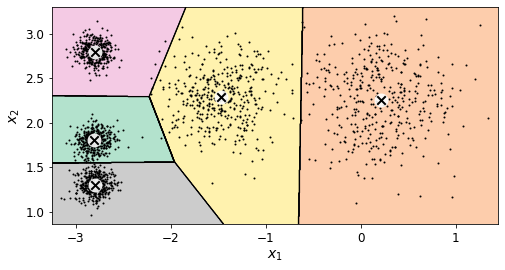

In [28]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], "k.", markersize=2)


def plot_centroids(centroids, weights=None, circle_color="w", cross_color="k"):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="o",
        s=35,
        linewidths=8,
        color=circle_color,
        zorder=10,
        alpha=0.9,
    )
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=2,
        linewidths=12,
        color=cross_color,
        zorder=11,
        alpha=1,
    )


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution),
    )
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors="k")
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    plt.xlabel(r"$x_{1}$", fontsize=14)
    plt.ylabel(r"$x_{2}$", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()


#### Hard Clustering vs Soft Clustering

In [29]:
ret = kmeans.transform(X_new)
print(ret)

[[2.81093633 0.32995317 2.9042344  1.49439034 2.88633901]
 [5.80730058 2.80290755 5.84739223 4.4759332  5.84236351]
 [1.21475352 3.29399768 0.29040966 1.69136631 1.71086031]
 [0.72581411 3.21806371 0.36159148 1.54808703 1.21567622]]


In [31]:
ret = np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)
print(ret)

[[2.81093633 0.32995317 2.9042344  1.49439034 2.88633901]
 [5.80730058 2.80290755 5.84739223 4.4759332  5.84236351]
 [1.21475352 3.29399768 0.29040966 1.69136631 1.71086031]
 [0.72581411 3.21806371 0.36159148 1.54808703 1.21567622]]


### The K-means Algorithm

In [32]:
kmeans_iter1 = KMeans(
    n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=1, random_state=0
)
kmeans_iter2 = KMeans(
    n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=2, random_state=0
)
kmeans_iter3 = KMeans(
    n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=3, random_state=0
)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

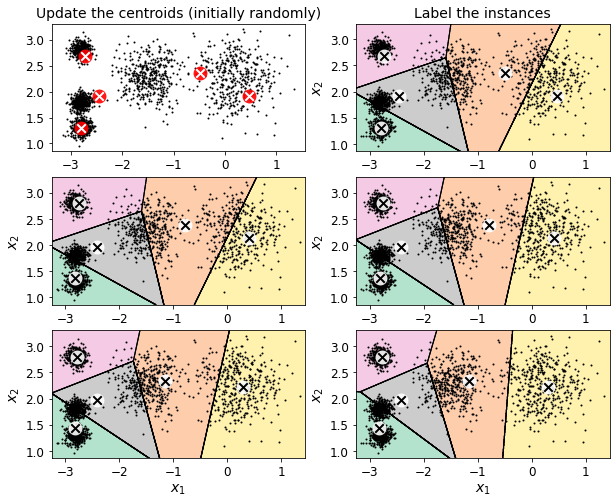

In [43]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color="r", cross_color="w")
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X)

plt.show()


#### Inertia

In [45]:
print(kmeans.inertia_)
print(kmeans.score(X))

211.5985372581684
-211.59853725816836


#### Mini-Batch K-Means

In [46]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [47]:
%timeit KMeans(n_clusters=5, random_state=42).fit(X)

70.9 ms ± 8.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

55.7 ms ± 5.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Find the optimal number of clusters

In [55]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]

from sklearn.metrics import silhouette_score
silhouette_scores = [
	silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]
]

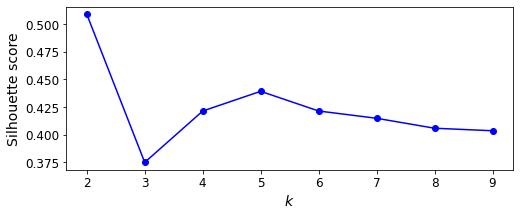

In [58]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel(r"$k$", fontsize=14)
plt.ylabel(r"Silhouette score", fontsize=14)
plt.show()


### Limits of K-Means

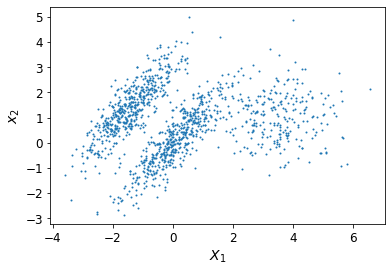

In [49]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_cluster(X)

In [59]:
kmeans_good = KMeans(
    n_clusters=3,
    init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
    n_init=1,
    random_state=42,
)
kmeans_bad = KMeans(n_clusters=3, random_state=42)

kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

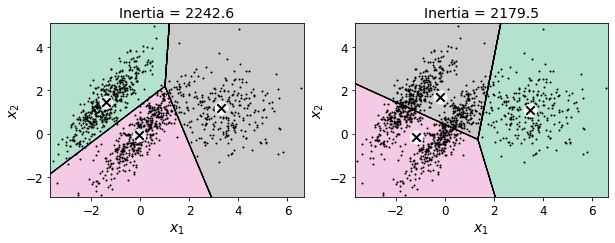

In [61]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()


### Using Clustering for Image Segmentation

In [63]:
import urllib

images_path = os.path.join("./", "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7f974e2c7eb0>)

In [66]:
from matplotlib.image import imread

image = imread(os.path.join(images_path, filename))
print(image.shape)
assert image.shape[2] == 3

(533, 800, 3)


In [68]:
X = image.reshape(-1, 3)  # Conver the image just to a rows (vector) of RGB values
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)


In [74]:
print(kmeans.cluster_centers_[kmeans.labels_])
print(kmeans.cluster_centers_.shape)
print(kmeans.labels_.shape)

[[0.02285826 0.11067164 0.00578478]
 [0.02285826 0.11067164 0.00578478]
 [0.02285826 0.11067164 0.00578478]
 ...
 [0.0999054  0.2542202  0.01693691]
 [0.02285826 0.11067164 0.00578478]
 [0.02285826 0.11067164 0.00578478]]
(8, 3)
(426400,)


In [75]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)

for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))


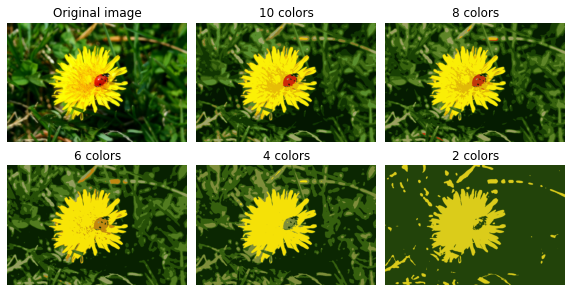

In [77]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis("off")

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()

### Using Clustering for Pre-processing

In [78]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [81]:
log_reg_score = log_reg.score(X_test, y_test)
print(log_reg_score)

0.9688888888888889


In [85]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [
        ("kmeans", KMeans(n_clusters=57, random_state=42)),
        (
            "log_reg",
            LogisticRegression(
                multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42
            ),
        ),
    ]
)

pipeline.fit(X_train, y_train)


Pipeline(steps=[('kmeans', KMeans(n_clusters=57, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [86]:
pipeline_score = pipeline.score(X_test, y_test)
print(pipeline_score)


0.9755555555555555


In [87]:
ret = 1 - (1 - pipeline_score) / (1 - log_reg_score)
print(ret)


0.2142857142857122


### Using Clustering for Semi-Supervised Learning

In [88]:
n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
ret = log_reg.score(X_test, y_test)
print(ret)

0.8333333333333334


In [92]:
k = 50

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
# The digits that have the minimal distance to the centroid
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
print(representative_digit_idx)
X_representative_digits = X_train[representative_digit_idx]

[ 911  559   23  159  736 1056  776  795  753  598  737  683 1194  602
  817 1284   73  702   94  891  805 1071 1314 1022 1050  525  588  481
 1005  766  848  731  749 1322 1336  705 1151  494  357  459  843  850
  151  256  576  460  596  648  841  214]


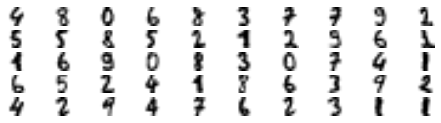

In [95]:
plt.figure(figsize=(8, 2))

for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis("off")

plt.show()


In [99]:
ret = y_train[representative_digit_idx]
print(ret)

y_representative_digits = ret

[4 8 0 6 8 3 7 7 9 2 5 5 8 5 2 1 2 9 6 1 1 6 9 0 8 3 0 7 4 1 6 5 2 4 1 8 6
 3 9 2 4 2 9 4 7 6 2 3 1 1]


In [101]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
ret = log_reg.score(X_test, y_test)
print(ret)

0.9222222222222223


In [110]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
print(y_train_propagated.shape)
print(y_train_propagated[:3])

print(kmeans.labels_.shape)
print(1 == kmeans.labels_)

for i in range(k):
	# Replace the items with the given cluster
    y_train_propagated[i == kmeans.labels_] = y_representative_digits[i]


(1347,)
[-1869786800       32663 -1869786800]
(1347,)
[False False False ... False False False]


In [111]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

ret = log_reg.score(X_test, y_test)
print(ret)

0.9333333333333333


In [113]:
percentile_closet = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = kmeans.labels_ == i
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closet)
    above_cutoff = X_cluster_dist > cutoff_distance
    X_cluster_dist[in_cluster & above_cutoff] = -1


In [114]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train[partially_propagated]

In [116]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

ret = log_reg.score(X_test, y_test)
print(ret)

0.9577777777777777


## DBSCAN

In [118]:
from sklearn.datasets import make_moons

In [126]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [128]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [132]:
print(dbscan.labels_[:10])
print(dbscan.core_sample_indices_[:10])

[ 0  2 -1 -1  1  0  0  0  2  5]
[ 0  4  5  6  7  8 10 11 12 13]


In [133]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [134]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(
        cores[:, 0],
        cores[:, 1],
        c=dbscan.labels_[core_mask],
        marker="o",
        s=size,
        cmap="Paired",
    )
    plt.scatter(cores[:, 0], cores[:, 1], marker="*", s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(
        non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker="."
    )
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(
        "eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14
    )


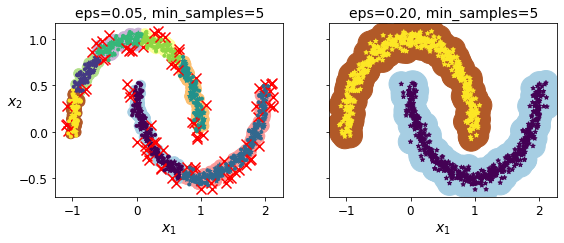

In [136]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

### Gaussian Mixtures

In [138]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]


In [139]:
from sklearn.mixture import GaussianMixture

In [150]:
# The Gaussian Mixture class provided by the scikit-learn is super easy to use
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [143]:
print(gm.weights_)
print(gm.means_)
print(gm.covariances_)

[0.39025715 0.40007391 0.20966893]
[[ 0.05131611  0.07521837]
 [-1.40763156  1.42708225]
 [ 3.39893794  1.05928897]]
[[[ 0.68799922  0.79606357]
  [ 0.79606357  1.21236106]]

 [[ 0.63479409  0.72970799]
  [ 0.72970799  1.1610351 ]]

 [[ 1.14833585 -0.03256179]
  [-0.03256179  0.95490931]]]


In [147]:
print(gm.converged_)
print(gm.n_iter_)

print(gm.predict(X))
print(gm.predict_proba(X))

True
4
[0 0 1 ... 2 2 2]
[[9.76741808e-01 6.78581203e-07 2.32575136e-02]
 [9.82832955e-01 6.76173663e-04 1.64908714e-02]
 [7.46494398e-05 9.99923327e-01 2.02398402e-06]
 ...
 [4.26050456e-07 2.15512941e-26 9.99999574e-01]
 [5.04987704e-16 1.48083217e-41 1.00000000e+00]
 [2.24602826e-15 8.11457779e-41 1.00000000e+00]]


In [151]:
X_new, y_new = gm.sample(6)
print(X_new)
print(y_new)

[[-0.86944074 -0.32767626]
 [ 0.29836051  0.28297011]
 [-2.8014927  -0.09047309]
 [ 3.98203732  1.49951491]
 [ 3.81677148  0.53095244]
 [ 2.84104923 -0.73858639]]
[0 0 1 2 2 2]


In [152]:
print(gm.score_samples(X))

[-2.60768954 -3.57110232 -3.32987086 ... -3.51347241 -4.39798588
 -3.80746532]


In [153]:
resolution = 100

grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
print(pdf_probas.sum())

0.999999999921502


In [167]:
from matplotlib.colors import LogNorm


def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    # Get the min and max values of each column
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution),
    )
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(
        xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12)
    )
    plt.contour(
        xx,
        yy,
        Z,
        norm=LogNorm(vmin=1.0, vmax=30.0),
        levels=np.logspace(0, 2, 12),
        linewidths=1,
        colors="k",
    )

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors="r", linestyles="dashed")

    plt.plot(X[:, 0], X[:, 1], "k.", markersize=2)


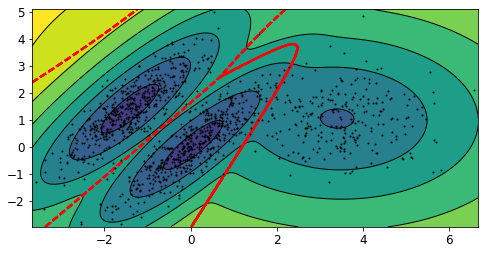

In [168]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)

plt.show()

### Anomaly Detection Using Gaussian Mixtures

In [171]:
densities = gm.score_samples(X)
# Get the 4-th percentile of the given data
density_threshold = np.percentile(densities, 4)
print(density_threshold)
anomalies = X[densities < density_threshold]
print(X.shape)
print(anomalies.shape)

-5.48741377669803
(1250, 2)
(50, 2)


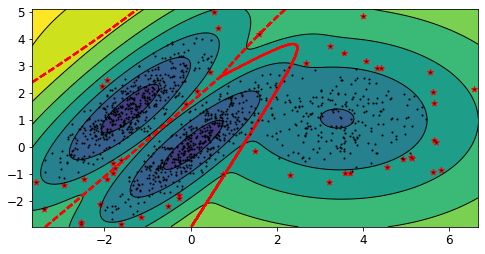

In [175]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
# Plot the anomalies with 4% percentile
plt.scatter(anomalies[:, 0], anomalies[:, 1], color="r", marker="*")
plt.ylim(top=5.1)

plt.show()


#### Selecting The Number of Clusters

In [177]:
print("BIC: {}".format(gm.bic(X)))
print("AIC: {}".format(gm.aic(X)))

BIC: 8189.747000497186
AIC: 8102.521720382148


In [178]:
gms_per_k = [
    GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
    for k in range(1, 11)
]


In [179]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

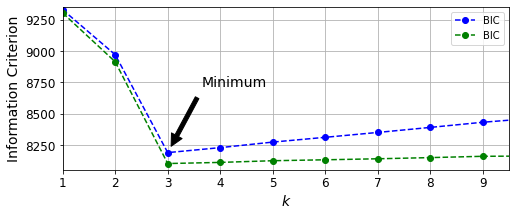

In [184]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo--", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="BIC")
plt.xlabel(r"$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate(
    "Minimum",
    xy=(3, bics[2]),
    xytext=(0.35, 0.6),
    fontsize=14,
    textcoords="figure fraction",
    arrowprops=dict(facecolor="k", shrink=0.1),
)
plt.legend()
plt.grid()
plt.show()


### Bayesian Gaussian Mixture Models

In [185]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [187]:
ret = np.round(bgm.weights_, decimals=2)
print(ret)


[0.4  0.21 0.4  0.   0.   0.   0.   0.   0.   0.  ]
